In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
from datetime import datetime, timedelta
import os

In [79]:
DB = sqlite3.connect('varlesaldytuvai.db')
C = DB.cursor()
sql="""SELECT * FROM saldytuvai;"""
dfv = pd.read_sql_query(sql, con=DB)
dfv['kaina']=dfv['kaina'].astype(float)

In [78]:
DB = sqlite3.connect('pigusaldytuvai.db')
C = DB.cursor()
sql="""SELECT * FROM saldytuvai;"""
dfp = pd.read_sql_query(sql, con=DB)
dfp = dfp.dropna(subset=['kaina'])
dfp['kaina'] = dfp['kaina'].apply(lambda x: str(x).replace(' ', ''))
dfp['kaina']=dfp['kaina'].astype(float)

In [4]:
dfv1=dfv
dfv1['kaina']=dfv1['kaina'].astype(float)
dfv1 = dfv1.dropna(subset=['montavimo tipas'])
# dfv = dfv[dfv['montavimo tipas'].notnull() & (dfv['montavimo tipas'] != '')]
dfv1['montavimo tipas'] = dfv1['montavimo tipas'].apply(lambda x: str(x).replace('laisvai pastatoma', 'laisvai pastatomas'))
dfv1['montavimo tipas'] = dfv1['montavimo tipas'].apply(lambda x: str(x).replace('laisvai pastatomos', 'laisvai pastatomas'))
dfv1['montavimo tipas'] = dfv1['montavimo tipas'].apply(lambda x: str(x).replace('laisvai statomi', 'laisvai pastatomas'))
dfv1['montavimo tipas'] = dfv1['montavimo tipas'].apply(lambda x: str(x).replace('pastatytas', 'laisvai pastatomas'))
dfv1['montavimo tipas'] = dfv1['montavimo tipas'].apply(lambda x: str(x).replace('įmontuojami', 'laikinas'))
dfv1['montavimo tipas'] = dfv1['montavimo tipas'].apply(lambda x: str(x).replace('montuojami', 'įmontuojamas'))
dfv1['montavimo tipas'] = dfv1['montavimo tipas'].apply(lambda x: str(x).replace('laikinas', 'įmontuojamas'))
montipv= dfv1.groupby('montavimo tipas')['kaina'].mean().reset_index()

In [5]:
dfp1=dfp
dfp1 = dfp1.dropna(subset=['kaina'])
dfp1['kaina'] = dfp1['kaina'].apply(lambda x: str(x).replace(' ', ''))
dfp1['kaina']=dfp1['kaina'].astype(float)
dfp1 = dfp1.dropna(subset=['montavimo tipas:'])
montipp= dfp1.groupby('montavimo tipas:')['kaina'].mean().reset_index()

In [ ]:
montipp.rename(columns={'montavimo tipas:': 'montavimo tipas'}, inplace=True)
montipp['pardavejas']='pigu.lt'
montipv['pardavejas']='varle.lt'
montipabu = pd.concat([montipp, montipv], axis=0, ignore_index=True)

      montavimo tipas       kaina pardavejas
0  laisvai pastatomas  674.840659    pigu.lt
1        įmontuojamas  938.455556    pigu.lt
      montavimo tipas       kaina pardavejas
0  laisvai pastatomas  513.538920   varle.lt
1        įmontuojamas  987.436667   varle.lt


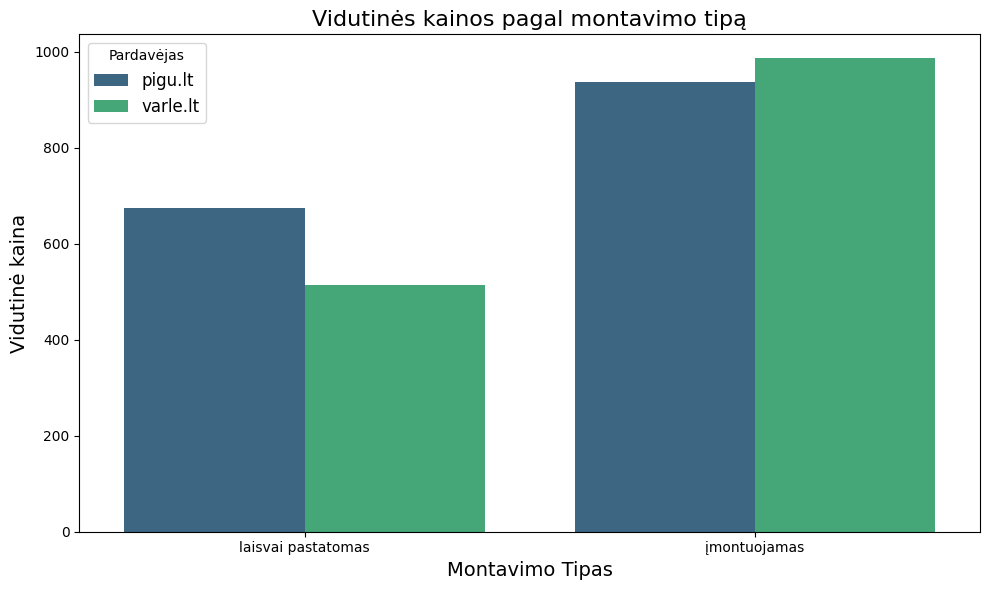

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=montipabu, x='montavimo tipas', y='kaina', hue='pardavejas', palette='viridis')

plt.title('Vidutinės kainos pagal montavimo tipą', fontsize=16)
plt.xlabel('Montavimo Tipas', fontsize=14)
plt.ylabel('Vidutinė kaina', fontsize=14)
plt.legend(title='Pardavėjas', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [8]:
dfv2 = dfv
dfv2 = dfv2.dropna(subset=['tipas'])
dfv2['tipas'] = dfv2['tipas'].apply(lambda x: str(x).replace('fridge without freezer', 'šaldytuvas be šaldiklio'))
dfv2['tipas'] = dfv2['tipas'].apply(lambda x: str(x).replace('be kameros', 'šaldytuvas be šaldiklio'))
dfv2['tipas'] = dfv2['tipas'].apply(lambda x: str(x).replace('dviduriai', 'dviduris šaldytuvas'))

dfv2['tipas'] = dfv2['tipas'].apply(lambda x: 'mini šaldytuvas' if 'mini' in str(x) else x)
dfv2['tipas'] = dfv2['tipas'].apply(lambda x: str(x).replace('su kamera viršuje', 'šaldytuvas su šaldikliu viršuje'))
dfv2['tipas'] = dfv2['tipas'].apply(lambda x: str(x).replace('fridge with top freezer', 'šaldytuvas su šaldikliu viršuje'))
dfv2['tipas'] = dfv2['tipas'].apply(lambda x: str(x).replace('vitrina', 'vitrininis šaldytuvas'))
dfv2['tipas'] = dfv2['tipas'].apply(lambda x: str(x).replace('su kamera apačioje', 'šaldytuvas su šaldikliu apačioje'))
dfv2['tipas'] = dfv2['tipas'].apply(lambda x: str(x).replace('šaldytuvas su apatiniu šaldikliu', 'šaldytuvas su šaldikliu apačioje'))
dfv2['tipas'] = dfv2['tipas'].apply(lambda x: str(x).replace('šaldytuvas be šaldiklio', 'šaldytuvas be šaldiklio'))
dfv2['tipas'] = dfv2['tipas'].apply(lambda x: str(x).replace('dviduris šaldytuvas', 'dviduris šaldytuvas'))

dfv2 = dfv2[dfv2['tipas'].isin(['mini šaldytuvas','dviduris šaldytuvas', 'vitrininis šaldytuvas','šaldytuvas be šaldiklio', 'šaldytuvas su šaldikliu viršuje', 'šaldytuvas su šaldikliu apačioje', ])]

tipasv= dfv2.groupby('tipas')['kaina'].mean().reset_index().sort_values('kaina')
tipasv['pardavejas']='varle.lt'

In [10]:
dfp2 = dfp
dfp2 = dfp2.dropna(subset=['šaldytuvo tipas:'])
dfp2 = dfp2[dfp2['šaldytuvo tipas:'].isin(['mini šaldytuvas','dviduris šaldytuvas', 'vitrininis šaldytuvas','šaldytuvas be šaldiklio', 'šaldytuvas su šaldikliu viršuje', 'šaldytuvas su šaldikliu apačioje', ])]

tipasp= dfp2.groupby('šaldytuvo tipas:')['kaina'].mean().reset_index().sort_values('kaina')
tipasp['pardavejas']= 'pigu.lt'
tipasp.rename(columns={'šaldytuvo tipas:': 'tipas'}, inplace=True)

In [12]:
tipasabu = pd.concat([tipasp, tipasv], axis=0, ignore_index=True)

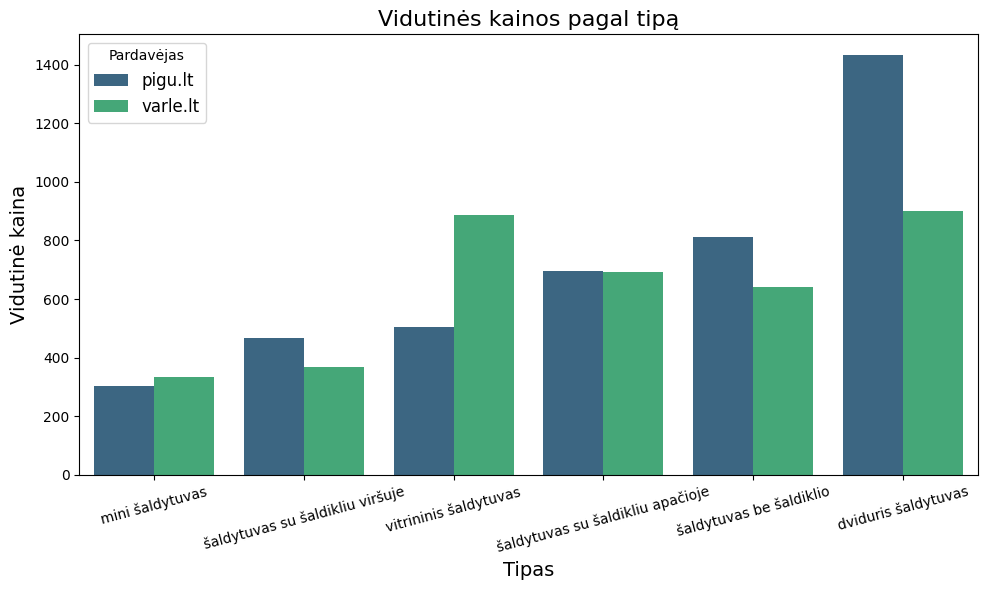

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tipasabu, x='tipas', y='kaina', hue='pardavejas', palette='viridis')

plt.title('Vidutinės kainos pagal tipą', fontsize=16)
plt.xlabel('Tipas', fontsize=14)
plt.ylabel('Vidutinė kaina', fontsize=14)
plt.legend(title='Pardavėjas', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()

plt.show()

In [14]:
dfv3=dfv
dfv3 = dfv3.dropna(subset=['gamintojas'])
value_counts =list(dfv3['gamintojas'].value_counts().head(14).keys())
dfv3 = dfv3[dfv3['gamintojas'].isin(value_counts)]
dfv3=dfv3.sort_values('gamintojas')

In [15]:
dfp3=dfp
dfp3 = dfp3.dropna(subset=['prekės ženklas:'])
value_counts =list(dfp3['prekės ženklas:'].value_counts().head(14).keys())
dfp3 = dfp3[dfp3['prekės ženklas:'].isin(value_counts)]
dfp3=dfp3.sort_values('prekės ženklas:')

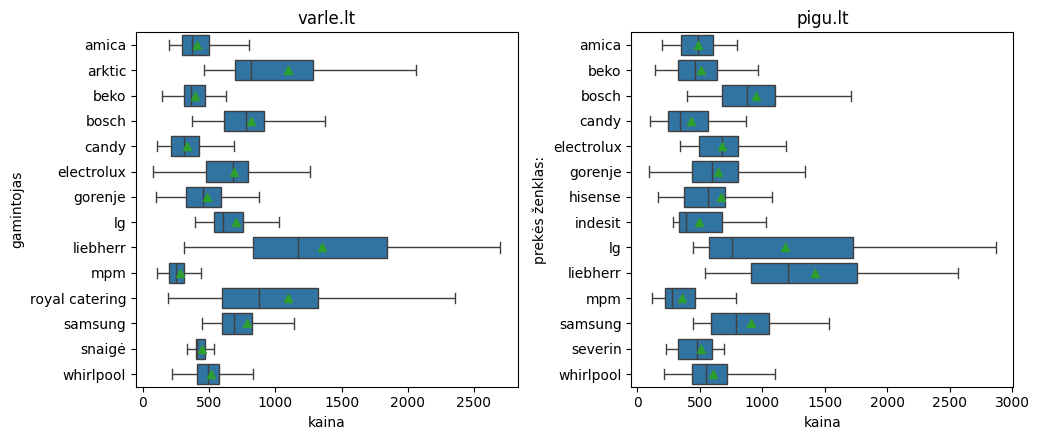

In [16]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(10.5, 4.5))
sns.boxplot(data=dfv3, y='gamintojas', x='kaina', showmeans=True, showfliers=False, ax=axis1)
sns.boxplot(data=dfp3, y='prekės ženklas:', x='kaina', showmeans=True, showfliers=False, ax=axis2)
axis1.set_title('varle.lt')
axis2.set_title('pigu.lt')
fig.tight_layout()
plt.show()

In [17]:
dfp4=dfp
dfp4 = dfp4.dropna(subset=['spalva:'])

spalvukiek = dfp4['spalva:'].value_counts()
spalvukiek = spalvukiek[spalvukiek > 100].index
gamintojukiek = dfp4['prekės ženklas:'].value_counts()
gamintojukiek = gamintojukiek[gamintojukiek >40].index

dfp4 = dfp4[dfp4['prekės ženklas:'].isin(gamintojukiek) & dfp4['spalva:'].isin(spalvukiek)]
dfp4=dfp4.groupby(['prekės ženklas:', 'spalva:'])['kaina'].mean().reset_index()

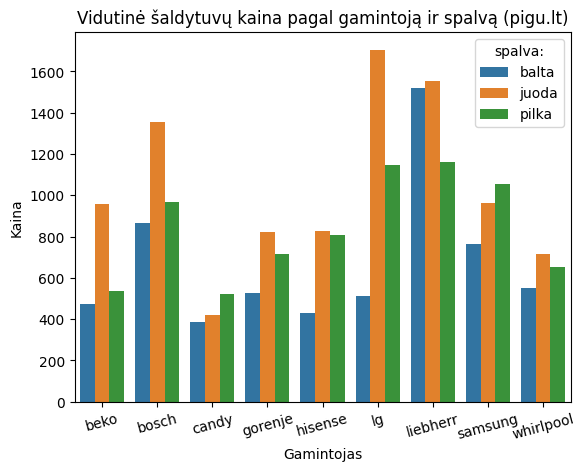

In [18]:
fig, ax = plt.subplots()
sns.barplot(data=dfp4, x='prekės ženklas:', y='kaina', hue='spalva:')
plt.title('Vidutinė šaldytuvų kaina pagal gamintoją ir spalvą (pigu.lt)')
plt.ylabel('Kaina')
plt.xlabel('Gamintojas')
plt.xticks(rotation=15)
plt.show()

In [19]:
dfv5=dfv[['kaina', 'energijos klasė']]
dfv5 = dfv5.dropna(subset=['energijos klasė'])
dfv5['energijos klasė'] = dfv5['energijos klasė'].apply(lambda x: str(x).replace('+', ''))
dfv5=dfv5.groupby(['energijos klasė'])['kaina'].mean().reset_index()
dfv5['pardavejas']='varle.lt'


dfp5=dfp[['kaina', 'energijos klasė:']]
dfp5 = dfp5.dropna(subset=['energijos klasė:'])
dfp5.rename(columns={'energijos klasė:': 'energijos klasė'}, inplace=True)
dfp5=dfp5.groupby(['energijos klasė'])['kaina'].mean().reset_index()
dfp5['pardavejas']='pigu.lt'


dfvp5 = pd.concat([dfv5, dfp5], axis=0, ignore_index=True)
dfvp5


,energijos klasė,kaina,pardavejas
0,a,687.204062,varle.lt
1,b,825.001923,varle.lt
2,c,1010.582581,varle.lt
3,d,963.826293,varle.lt
4,e,491.346574,varle.lt
5,f,525.358333,varle.lt
6,g,730.125000,varle.lt
7,a,711.000000,pigu.lt
8,b,1037.521739,pigu.lt
9,c,922.254902,pigu.lt


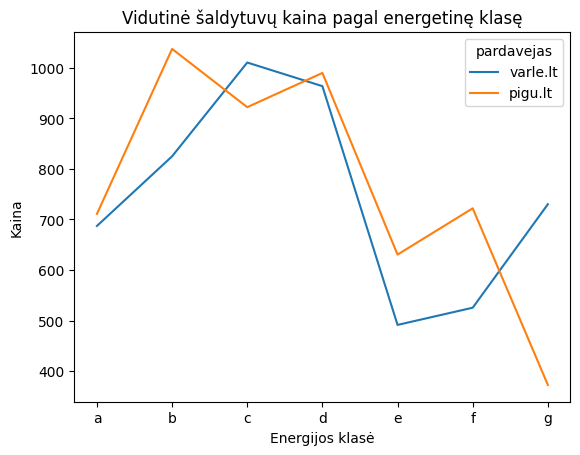

In [20]:
fig, ax = plt.subplots()
sns.lineplot(data=dfvp5, x='energijos klasė', y='kaina', hue='pardavejas')
plt.title('Vidutinė šaldytuvų kaina pagal energetinę klasę')
plt.ylabel('Kaina')
plt.xlabel('Energijos klasė')
plt.xticks(rotation=0)
plt.show()

In [42]:
dfv6=dfv[['kaina', 'talpa (l)']]
dfp6=dfp[['kaina', 'bendra talpa:']]
dfp6.rename(columns={'bendra talpa:': 'talpa (l)'}, inplace=True)
dfv6 = dfv6.dropna(subset=['talpa (l)'])
dfv6['talpa (l)']=dfv6['talpa (l)'].astype(float)
dfp6 = dfp6.dropna(subset=['talpa (l)'])
dfp6['talpa (l)']=dfp6['talpa (l)'].apply(lambda x: x.replace(' ','').replace('l', ''))
dfp6['talpa (l)']=dfp6['talpa (l)'].astype(float)
dfvp6= pd.concat([dfv6, dfp6], axis=0, ignore_index=True)


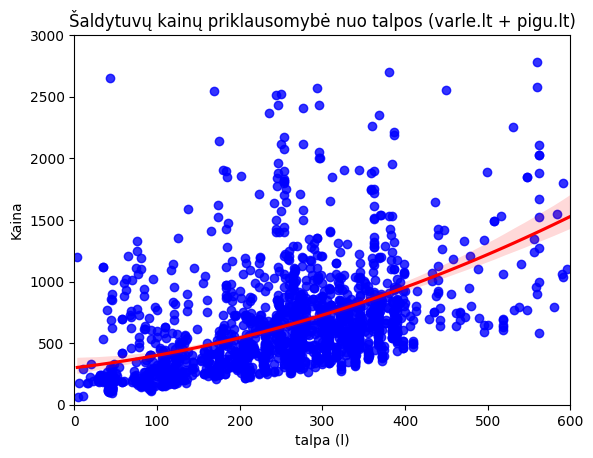

In [45]:
fig, ax = plt.subplots()
sns.regplot(data=dfvp6,x='talpa (l)', y='kaina', order=2, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax.set_xlabel('talpa (l)')
ax.set_ylabel('Kaina')
ax.set_xlim(0, 600)
ax.set_ylim(0, 3000)
plt.title('Šaldytuvų kainų priklausomybė nuo talpos (varle.lt + pigu.lt)')
plt.show()

In [60]:
dfp7 = dfp[['kaina', 'maksimalus triukšmo lygis:']]
dfp7 = dfp7.dropna(subset=['maksimalus triukšmo lygis:'])
dfp7['maksimalus triukšmo lygis:']=dfp7['maksimalus triukšmo lygis:'].apply(lambda x: x.replace(' ','').replace('db', '').replace('-',''))
dfp7['maksimalus triukšmo lygis:'] = dfp7['maksimalus triukšmo lygis:'].replace([' ', '-', ''], None)
dfp7 = dfp7.dropna(subset=['maksimalus triukšmo lygis:'])
dfp7['maksimalus triukšmo lygis:']=dfp7['maksimalus triukšmo lygis:'].astype(float)

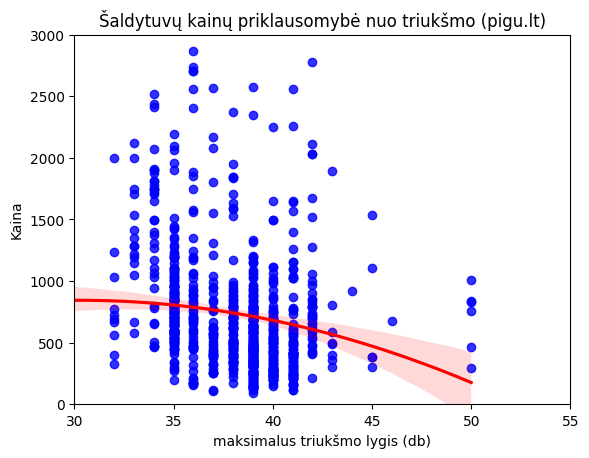

In [77]:
fig, ax = plt.subplots()
sns.regplot(data=dfp7,x='maksimalus triukšmo lygis:', y='kaina', order=2, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax.set_xlabel('maksimalus triukšmo lygis (db)')
ax.set_ylabel('Kaina')
ax.set_xlim(30, 55)
ax.set_ylim(0, 3000)
plt.title('Šaldytuvų kainų priklausomybė nuo triukšmo (pigu.lt)')
plt.show()